# **Import Libraries and modules**

In [1]:
#Here i am trying to built a three layer vanila network 
#On the 1st layer we have 8,16,32 channels respectively.
#On second layer we have 16,32 channels respectivel.
#On the third layer we have 3x3 kernels in 32 channel and 1x1 kernel in 10 channels

Using TensorFlow backend.


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


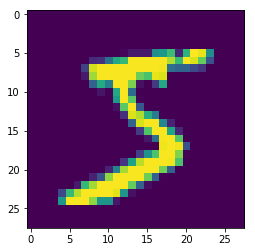

In [9]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation
model = Sequential()

#Layer 1

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16,3,3, activation= 'relu'))
model.add(Convolution2D(32,3,3, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 2

model.add(Convolution2D(8, 3,3, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 3

model.add(Convolution2D(16,3,3, activation= 'relu'))
model.add(Convolution2D(10,1,1))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 8)           2312      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          2336      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test,Y_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  864/60000 [..............................] - ETA: 11s - loss: 0.0067 - acc: 0.9965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 186us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.0552 - val_acc: 0.9895
Epoch 2/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0413 - val_acc: 0.9906
Epoch 3/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0451 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0412 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0453 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.0495 - val_acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0084 - acc: 0.9973 - val_loss: 0.0455 - val_acc: 0.9903
Epoch 8/10
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [42]:
print(score)

[0.05117901564381702, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred[:9])
print(y_test[:9])

[[1.53136089e-19 5.03218428e-19 8.57799668e-15 2.95282340e-11
  5.15794933e-19 3.04696218e-19 3.53922729e-30 1.00000000e+00
  1.08255205e-18 1.27431925e-16]
 [5.26550366e-11 1.08645968e-14 1.00000000e+00 2.20940355e-19
  1.47395430e-19 1.25166957e-25 7.67781209e-21 3.07076852e-25
  8.15984379e-13 2.94768618e-22]
 [7.81493561e-16 9.99999404e-01 6.74495615e-09 1.74610109e-12
  9.57351034e-08 4.33540315e-09 4.24816812e-13 4.73057241e-07
  9.44016740e-11 6.81014967e-12]
 [1.00000000e+00 2.20261455e-17 1.85493515e-18 1.09983582e-16
  9.53432144e-15 9.05224905e-17 1.17681531e-10 3.25292886e-19
  3.67336886e-15 7.25676436e-14]
 [2.14390377e-19 2.52284808e-11 6.34984006e-17 5.01992508e-22
  1.00000000e+00 1.59910734e-20 3.15603711e-18 2.85014477e-17
  3.48291593e-18 4.14748325e-09]
 [2.47500327e-16 9.99999881e-01 1.26170130e-09 2.83687353e-13
  1.99544203e-09 2.56667118e-11 5.20512080e-15 5.80376209e-08
  6.30773322e-10 3.30085286e-12]
 [1.93093742e-21 3.60543762e-13 4.95954003e-18 6.55999665e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

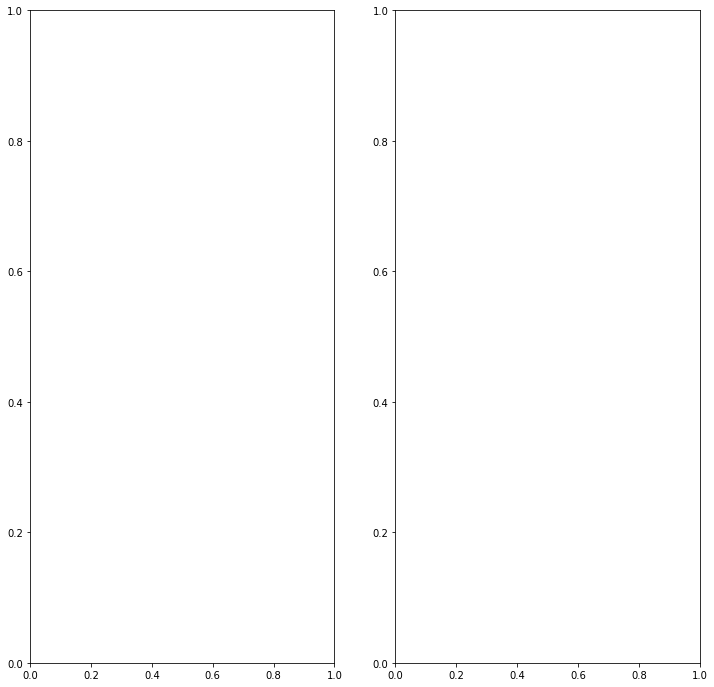

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()